<a href="https://colab.research.google.com/github/SamuelFI566/SIAFI_Proyecto_Final/blob/main/Proyecto_SIAFI_Ejercicio_3/Proyecto_SIAFI_Ejercicio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

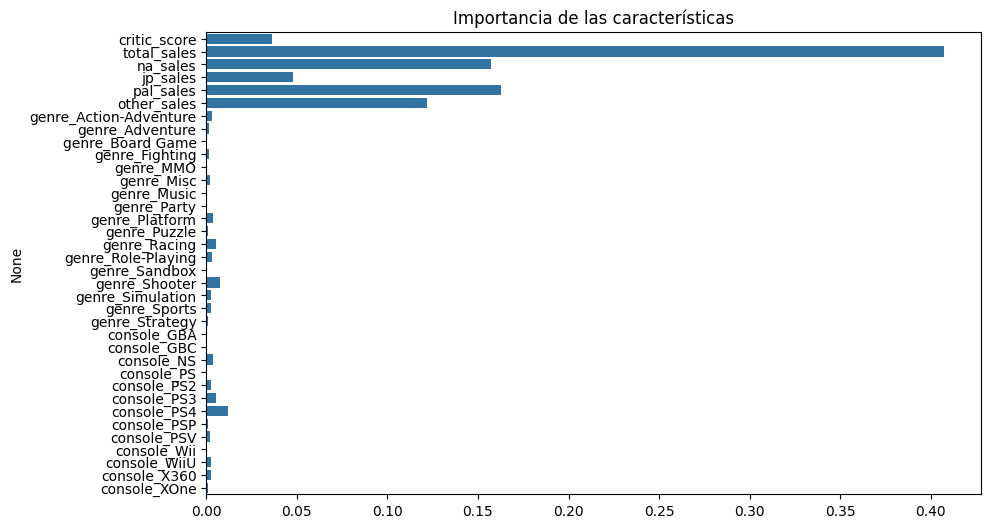

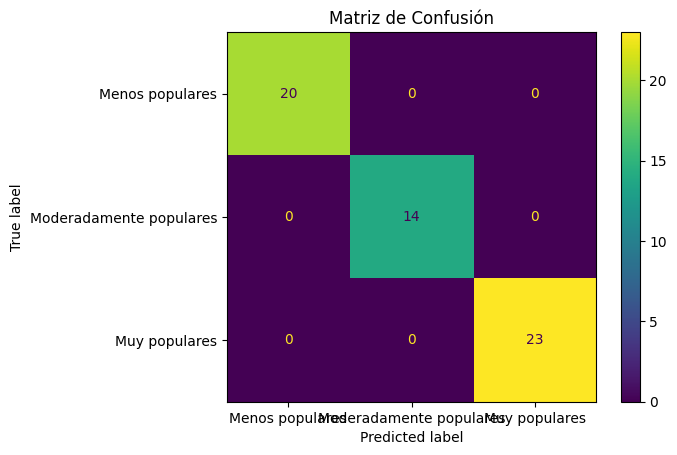

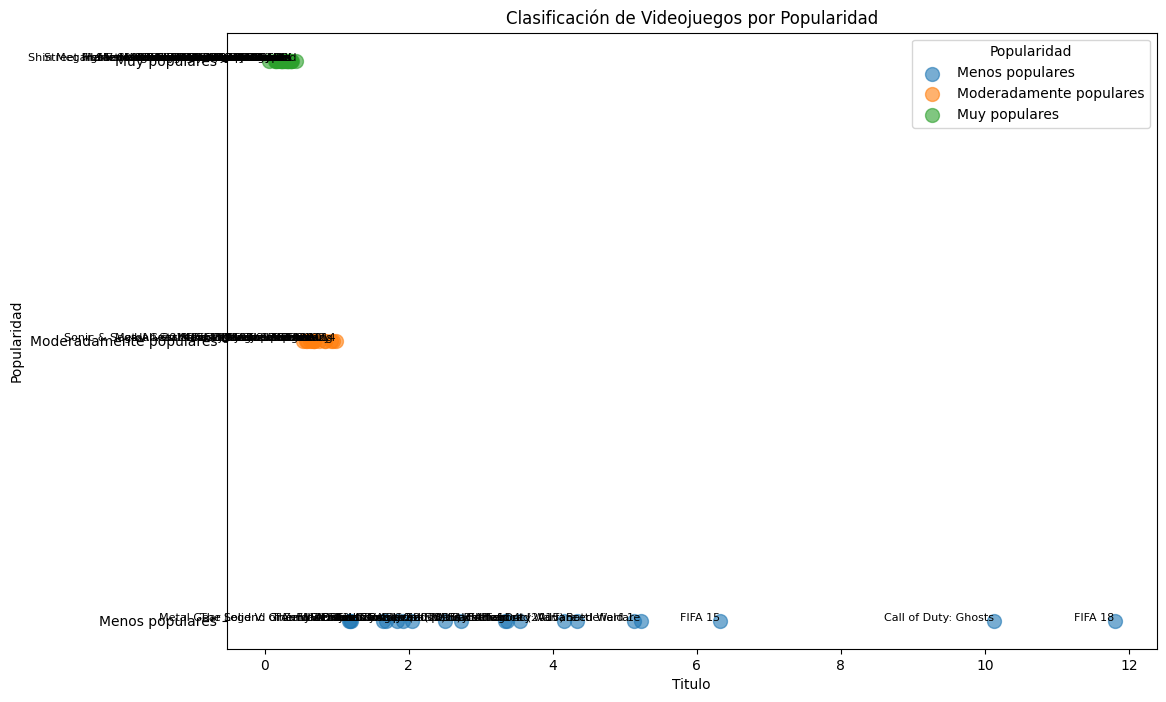

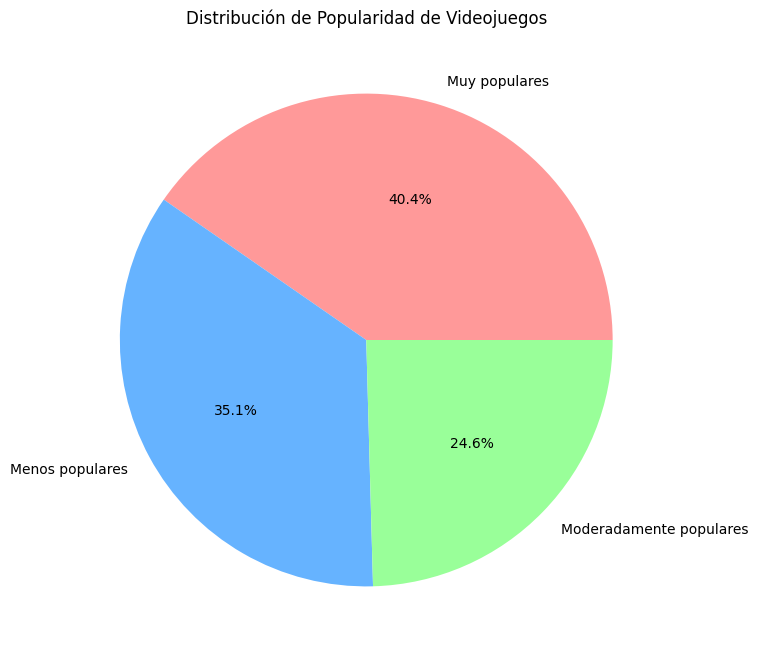

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# Cargar los datos
data = pd.read_csv('vgchartz-2024.csv')

# Guardar los nombres de los videojuegos antes de eliminar la columna 'title'
titles = data['title']

# Eliminar filas o columnas con demasiados valores faltantes
data = data.dropna()
data = data.drop(['img', 'title', 'publisher', 'developer', 'release_date', 'last_update'], axis=1)
data = pd.get_dummies(data, columns=['genre', 'console'], drop_first=True)

# Crear una nueva columna "Popularity" basada en ventas globales
conditions = [
    (data['total_sales'] > 1.0),   # Muy populares
    (data['total_sales'] > 0.5),   # Moderadamente populares
    (data['total_sales'] <= 0.5)   # Menos populares
]
choices = ['Muy populares', 'Moderadamente populares', 'Menos populares']
data['Popularity'] = pd.cut(data['total_sales'], bins=[0, 0.5, 1.0, float('inf')],
                            labels=choices)

X = data.drop(['Popularity'], axis=1)
y = data['Popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Obtener la importancia de las características y graficar
feature_importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Importancia de las características')
plt.show()

# Matriz de confusión para evaluar el modelo
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Matriz de Confusión")
plt.show()

# Añadir los títulos al DataFrame de prueba para asociarlos con la popularidad
X_test['title'] = titles[X_test.index]

# Crear una nueva columna con la popularidad de los videojuegos en el conjunto de prueba
X_test['popularity'] = y_test

# Graficar los títulos según su popularidad
plt.figure(figsize=(12, 8))
for label in X_test['popularity'].unique():
    subset = X_test[X_test['popularity'] == label]

    # Graficar y etiquetar los puntos
    plt.scatter(subset['total_sales'], [label] * len(subset), label=label, s=100, alpha=0.6)
    for i in range(len(subset)):
        plt.text(subset['total_sales'].iloc[i], label, subset['title'].iloc[i], fontsize=8, ha='right')

plt.xlabel('Titulo')
plt.ylabel('Popularidad')
plt.title('Clasificación de Videojuegos por Popularidad')
plt.legend(title='Popularidad')
plt.show()

# Gráfico de pastel con la distribución de popularidad de los videojuegos
popularity_counts = X_test['popularity'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(popularity_counts, labels=popularity_counts.index, autopct='%1.1f%%', colors=['#FF9999', '#66B3FF', '#99FF99'])
plt.title('Distribución de Popularidad de Videojuegos')
plt.show()






De acuerdo a la matriz de confusion creada a partir del modelo entrenado con random forest, podemos concluir que el desempeño de las clasificaciones del modelo son satisfactorias, pues no muestra ninguna clasificacion erronea en el nivel de popularidad de los juegos, al comparar esta informacion con los resultados de la grafica de pastel, observamos que efectivamente ambos muestran el mismo comportamiento en sentido de la cantidad de juegos clasificados dea cuerdo a cada nivel de popularidad.

En conclusion, el modelo clasifica de manera eficiente la popularidad de los juegos en base a la cantidad de ventas totales que este tuvo, tomando en menor medida otras variables como ventas por pais o puntuaciones otorgadas por la critica.